This file reads the generation data from the previously generated dataset containing all the generation data in the AUSGRID (should be stored in data/generation_ausgrid.csv). It then chooses one PV setup as a reference system ( with know size) and scales its production to different sizes ( e.g. in steps of 0.25kWp). Since we want to optimize the distribution of PV modules in a neighborhood, we assume that the generation from the PV has the same characteristics for houses close by (this also assumes same kind of roofs, which is ideally, but sufficient enough for this project).

In [7]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set file names
org_file =  'data/generation_ausgrid.csv'
export_file = 'data/normalized_generation_ausgrid_025steps.csv'

# Read file 
df = pd.read_csv(org_file)
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2012-07-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


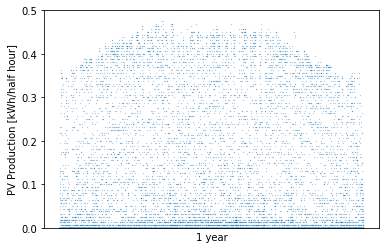

In [3]:
# Choose customer 3 as it has a 1kWp module installed
data_1kwp = df['3'].values
plt.xlabel('1 year')
plt.ylabel('PV Production [kWh/half hour]')
plt.xticks([])
plt.ylim(0,0.5)
plt.scatter(np.arange(len(data_1kwp)),data_1kwp,s=0.02)

In [4]:
# Define range of possible sizes of pv modules
poss_sizes = np.arange(0.25,10.25,0.25)

# Create new dataframe
df_store = pd.DataFrame(index=df.index)
for size in poss_sizes:
    df_store[str(size)] = size*data_1kwp

df_store.to_csv(export_file)

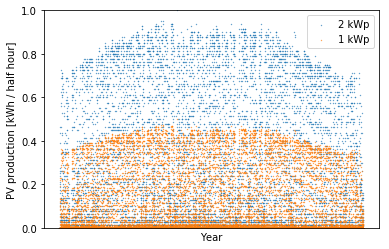

In [5]:
# Plot two different sizes
df_store.keys()
plt.xticks([])
plt.ylim(0,1)
plt.ylabel('PV production [kWh / half hour]')
plt.xlabel('Year')
plt.scatter(np.arange(df_store.shape[0]),df_store['2.0'],s=0.1,label='2 kWp')
plt.scatter(np.arange(df_store.shape[0]),df_store['1.0'],s=0.1, label='1 kWp')

plt.legend()